In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [2]:
from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

In [3]:
from sklearn.datasets import make_moons

labels = ['b', 'r']
X, y = make_moons(n_samples=400, noise=0.2, random_state=42)
y = np.take(labels, (y < 1))

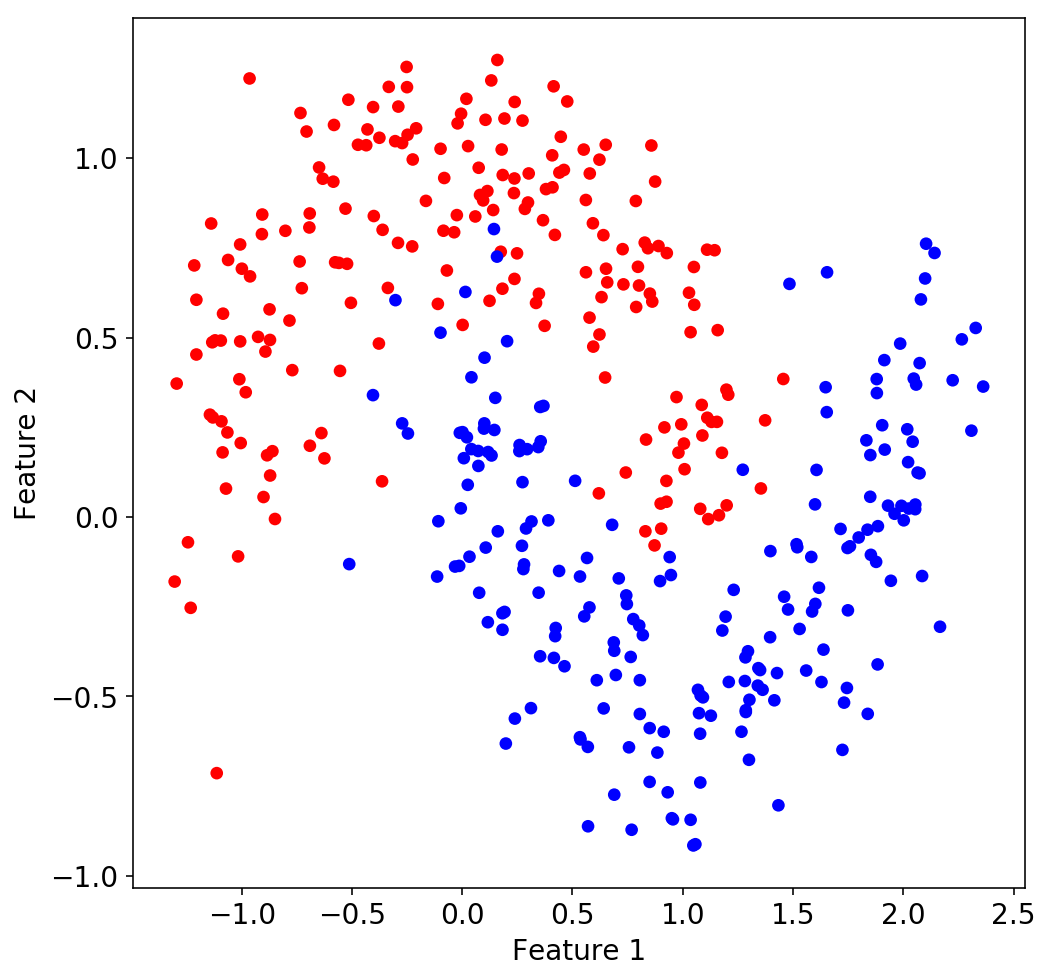

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

In [5]:
from ipywidgets import interact

from sklearn.tree import DecisionTreeClassifier

from utils import plot_surface


def tree(max_depth=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    clf.fit(X, y)
    plot_surface(clf, X, y)
    
interact(tree, max_depth=(1, 25))

interactive(children=(IntSlider(value=1, description='max_depth', max=25, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.tree>

In [6]:
from utils import draw_tree


def tree_structure(max_depth=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    clf.fit(X, y)
    return draw_tree(clf, ['X1', 'X2'], filled=True)
    
interact(tree_structure, max_depth=(1, 25))

interactive(children=(IntSlider(value=1, description='max_depth', max=25, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.tree_structure>

In [7]:
for d in (1, 2, 3, 10):
    clf = DecisionTreeClassifier(max_depth=d, random_state=1)
    clf.fit(X, y)
    draw_tree(clf, ['X1', 'X2'], svg_name="../../images/dt_structure_depth%i.svg"%d, filled=True)

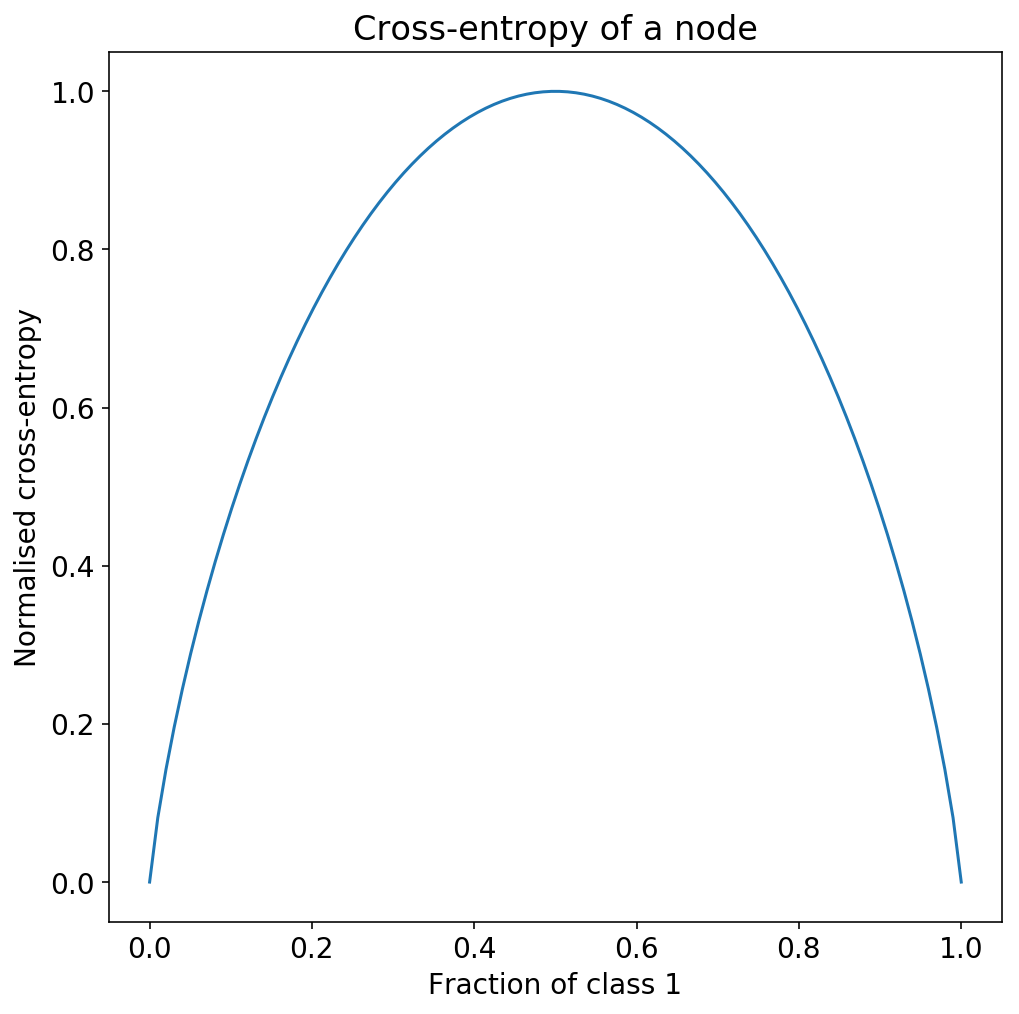

In [8]:
ps = np.linspace(0.000000000001, 0.9999999999999, 100)
ce = -(ps*np.log(ps) + (1-ps)*np.log(1-ps)) / (-2*(0.5*np.log(0.5)))
plt.plot(ps, ce);
plt.title("Cross-entropy of a node")
plt.ylabel("Normalised cross-entropy")
plt.xlabel("Fraction of class 1");
plt.savefig("../../images/cross-entropy.png")

In [9]:
clf = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
clf.fit(X, y)
draw_tree(clf, ['X1', 'X2'], svg_name="../../images/dt_entropy.svg", filled=True)

In [10]:
1 - 242/400 * 0.788 - 158/400*0.453

0.34432500000000005

In [11]:
clf = DecisionTreeClassifier(max_leaf_nodes=8, random_state=1)
clf.fit(X, y)
draw_tree(clf, ['X1', 'X2'],
          svg_name="../../images/dt_structure_max_leaf_nodes8.svg",
          filled=True)

In [12]:
clf = DecisionTreeClassifier(min_samples_split=40, random_state=1)
clf.fit(X, y)
draw_tree(clf, ['X1', 'X2'],
          svg_name="../../images/dt_structure_min_samples_split40.svg",
          filled=True)

/Users/thead/anaconda/envs/adv-comp-18/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


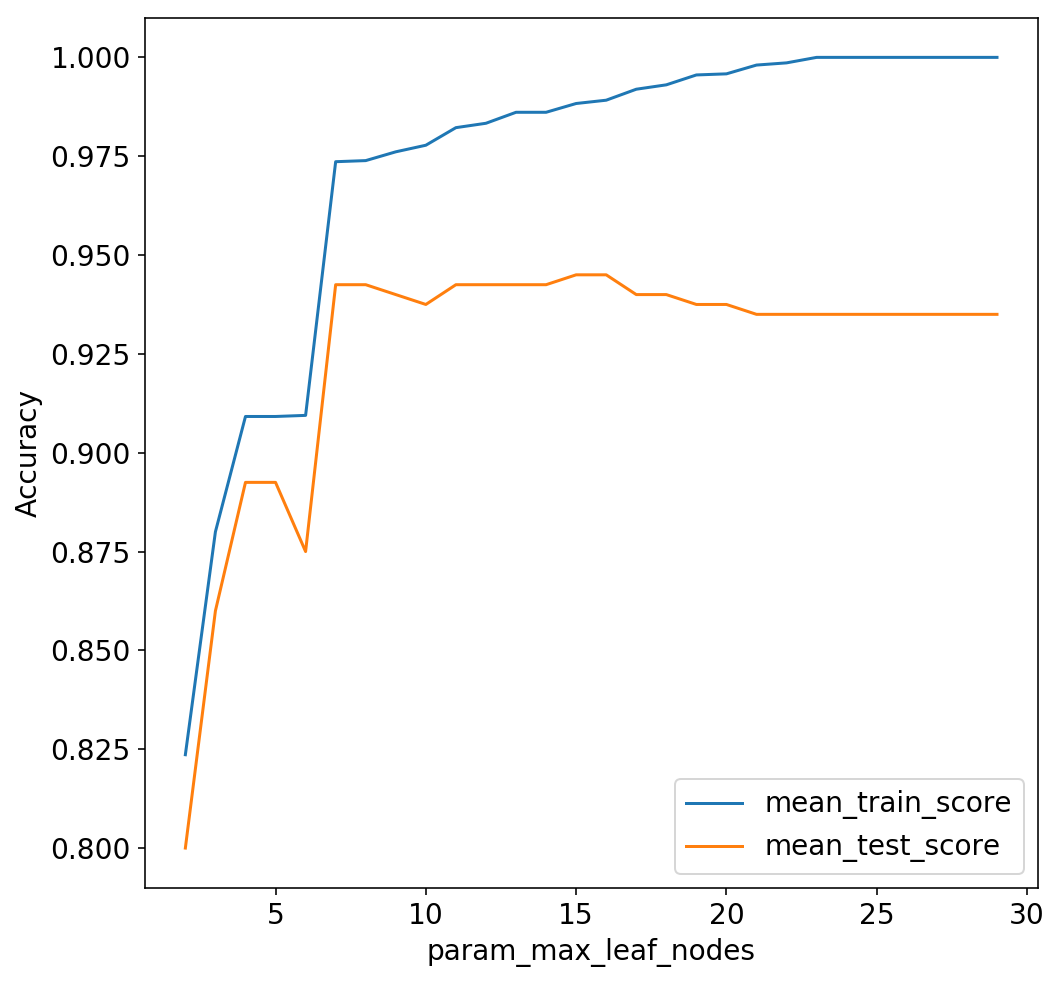

In [13]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes':range(2, 30)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True)
grid.fit(X, y)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes',
            y=['mean_train_score', 'mean_test_score'],
           )
plt.legend(loc='best')
plt.ylabel('Accuracy');
plt.savefig("../../images/dt_max_leaf_nodes_cv.png")

# Ensembles

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, load_breast_cancer

X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
y_label = np.take(labels, (y > 0.5))

X_train, X_test, y_train, y_test, y_label, _ = train_test_split(X, y, y_label,
                                                                stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
                          voting='soft')
voting.fit(X_train, y_train)

lr, tree = voting.estimators_

print(("{:.2f} " * 3).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test),
                             tree.score(X_test, y_test)))

0.88 0.84 0.80 


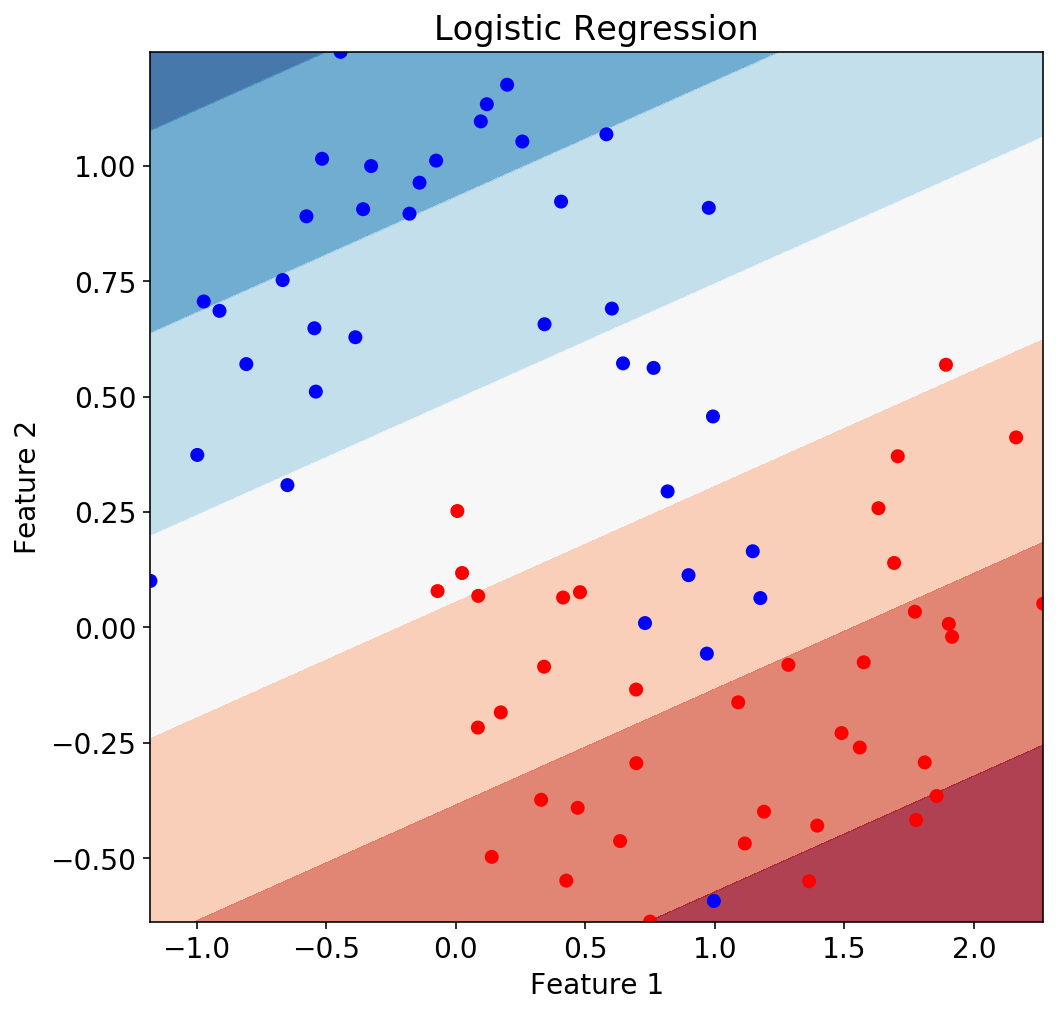

In [15]:
plot_surface(lr, X_train, y_label, show=False)
plt.title("Logistic Regression");
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");
plt.savefig("../../images/voting_lr.png");

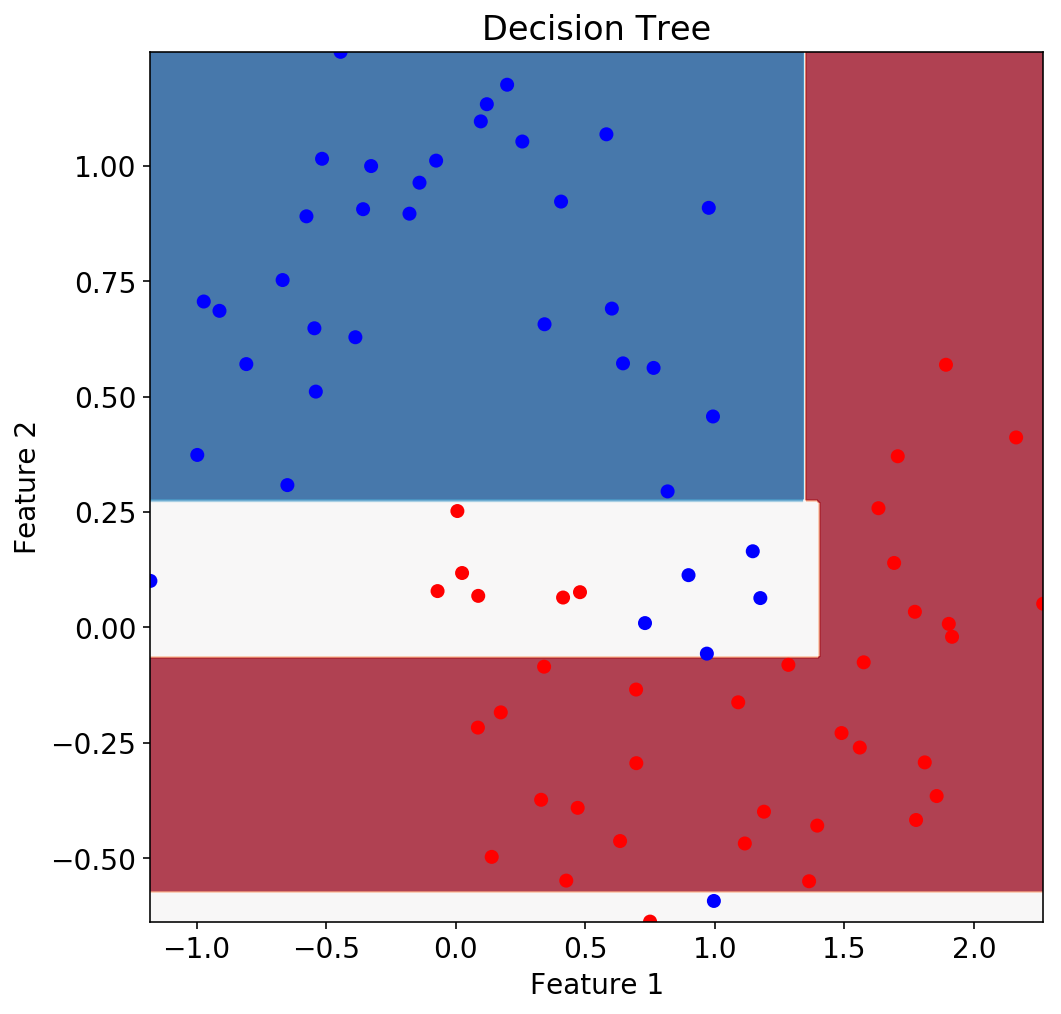

In [16]:
plot_surface(tree, X_train, y_label, show=False)
plt.title("Decision Tree");
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");
plt.savefig("../../images/voting_dt.png")

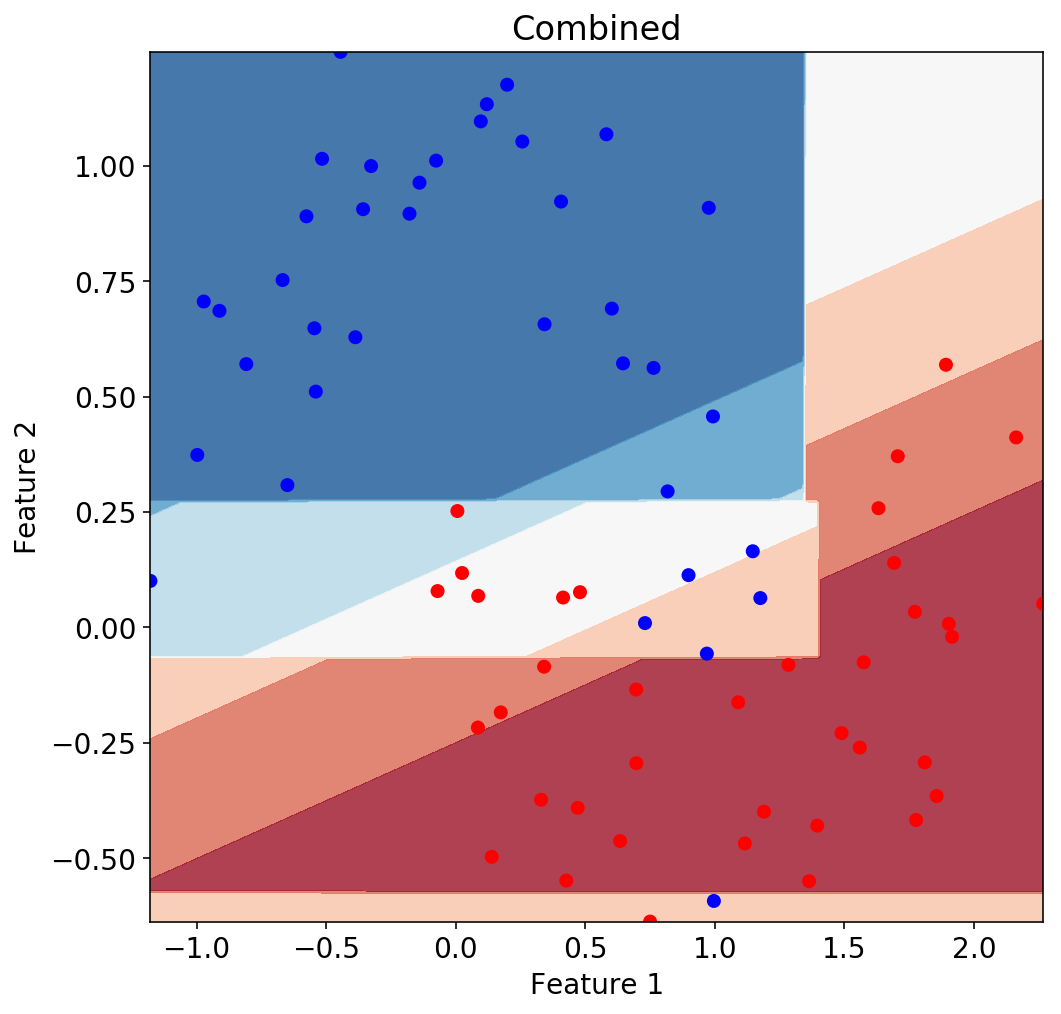

In [17]:
plot_surface(voting, X_train, y_label, show=False)
plt.title("Combined");
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");
plt.savefig("../../images/voting_combined.png")

## Random forests

In [18]:
labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=1)

In [20]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

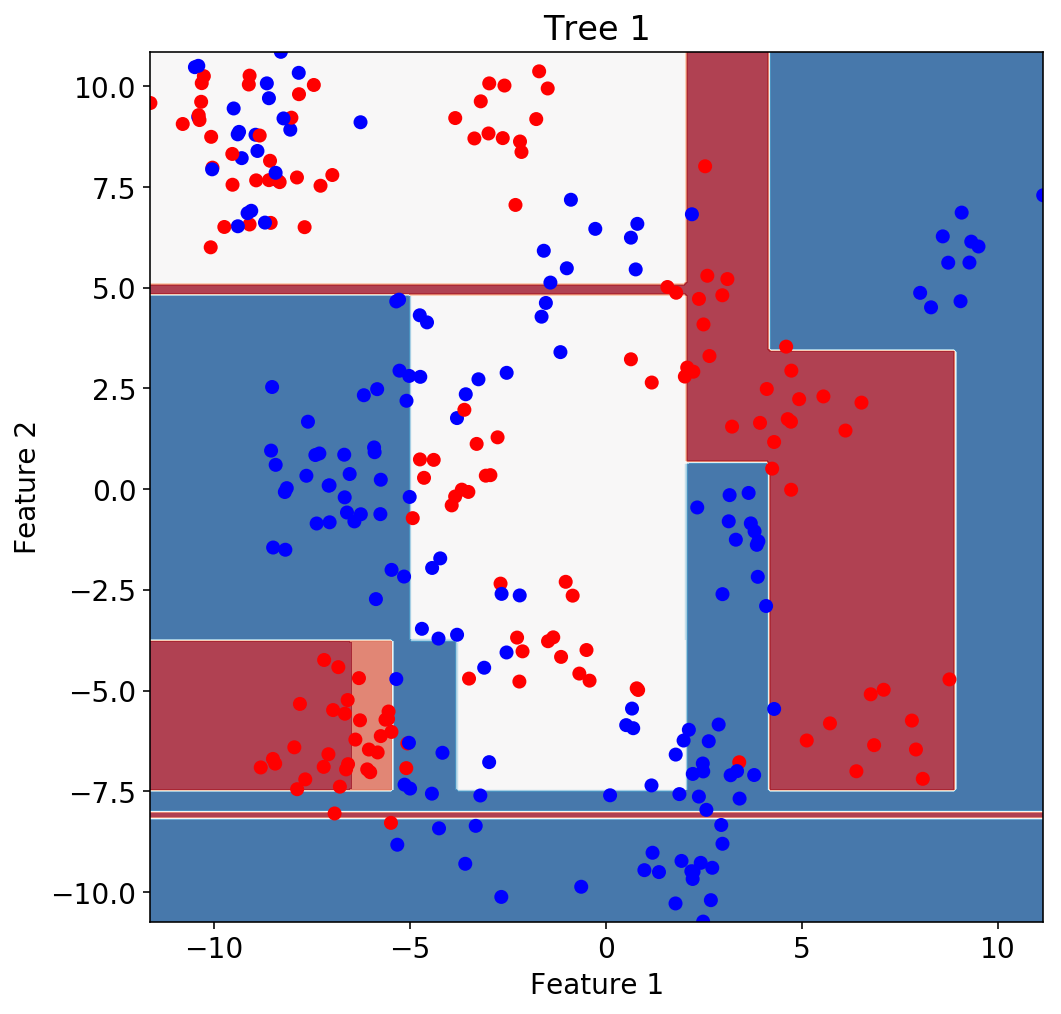

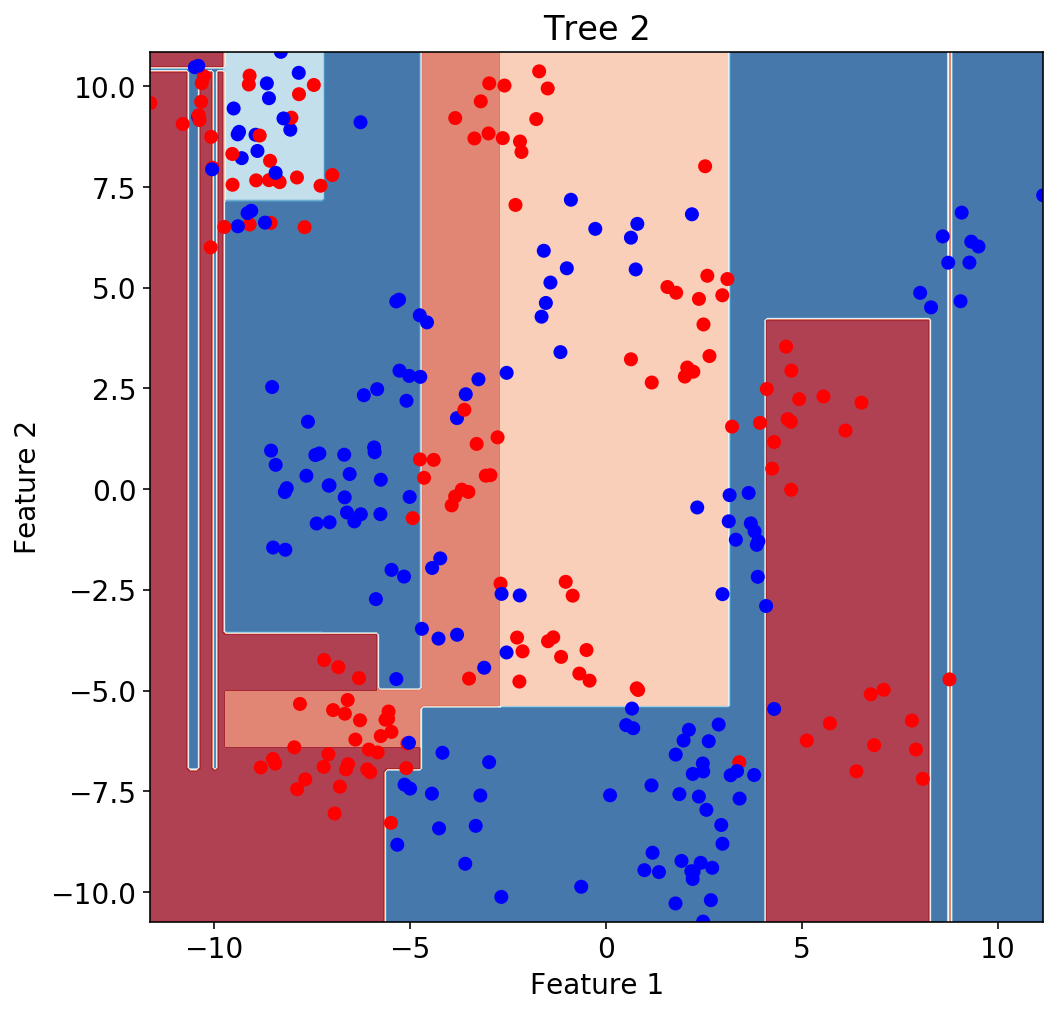

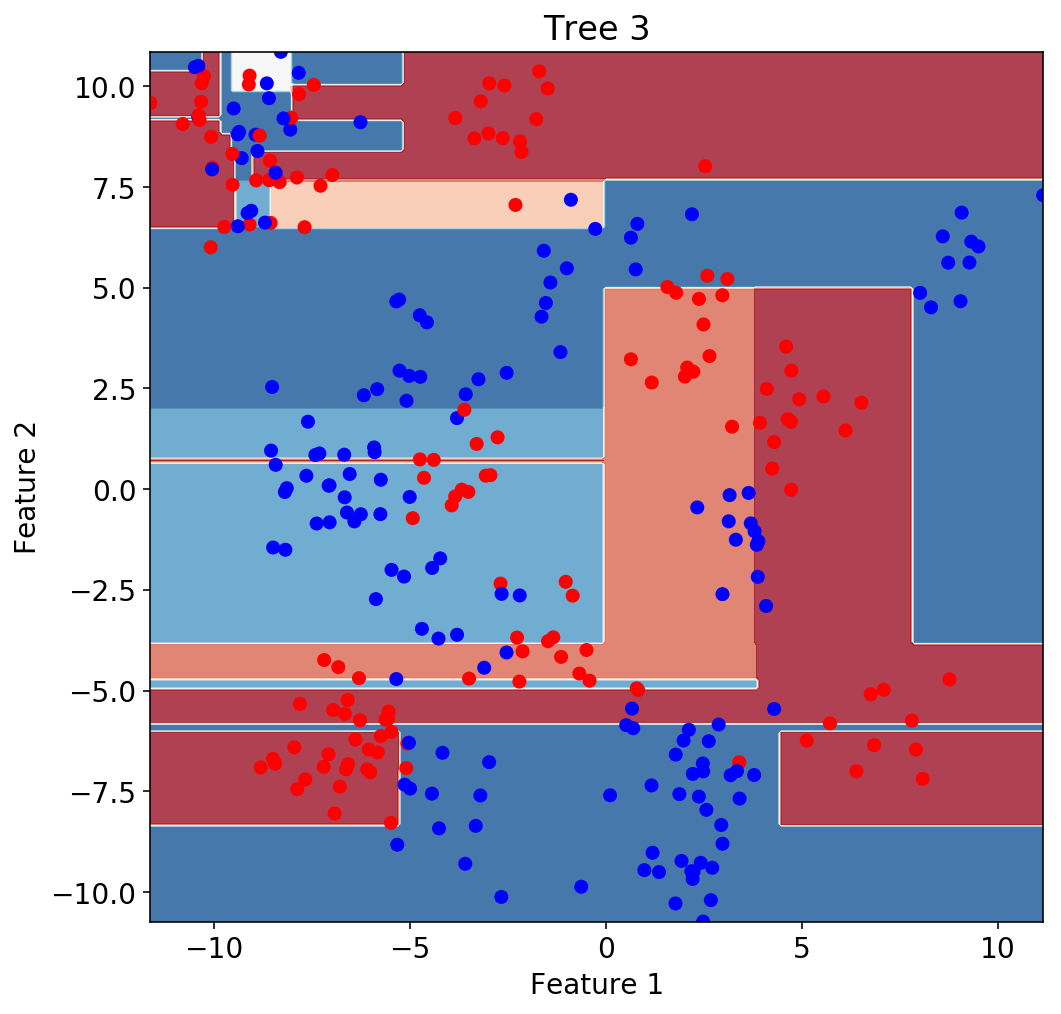

In [21]:
for i, est in zip(range(3), clf.estimators_):
    plot_surface(est, X_train, y_train, show=False)
    plt.title("Tree %i" %(i+1));
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2");
    plt.savefig("../../images/rf_trees_%i.png" % i);

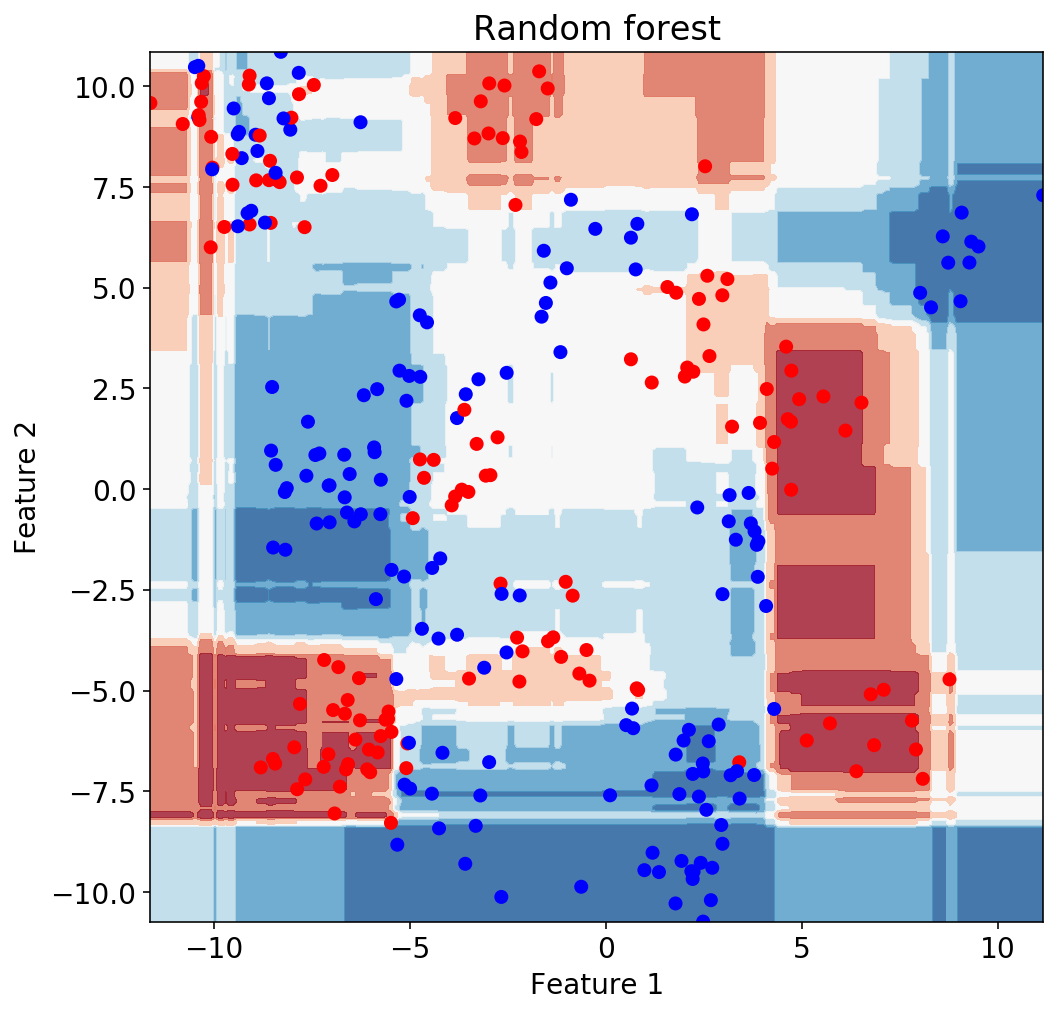

In [22]:
plot_surface(clf, X_train, y_train, show=False)
plt.title("Random forest");
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");
plt.savefig("../../images/rf_all_trees.png");

# Gradient boosting illustrated

In [23]:
def f(x):
    return x + np.sin(x) + np.sin(3 * x)

line = np.linspace(0, 10, 200)
x = np.linspace(0, 10, 200)
rng = np.random.RandomState(0)
rng.shuffle(x)
X = np.sort(x[:40])
y = f(X)

X = X.reshape(-1, 1)

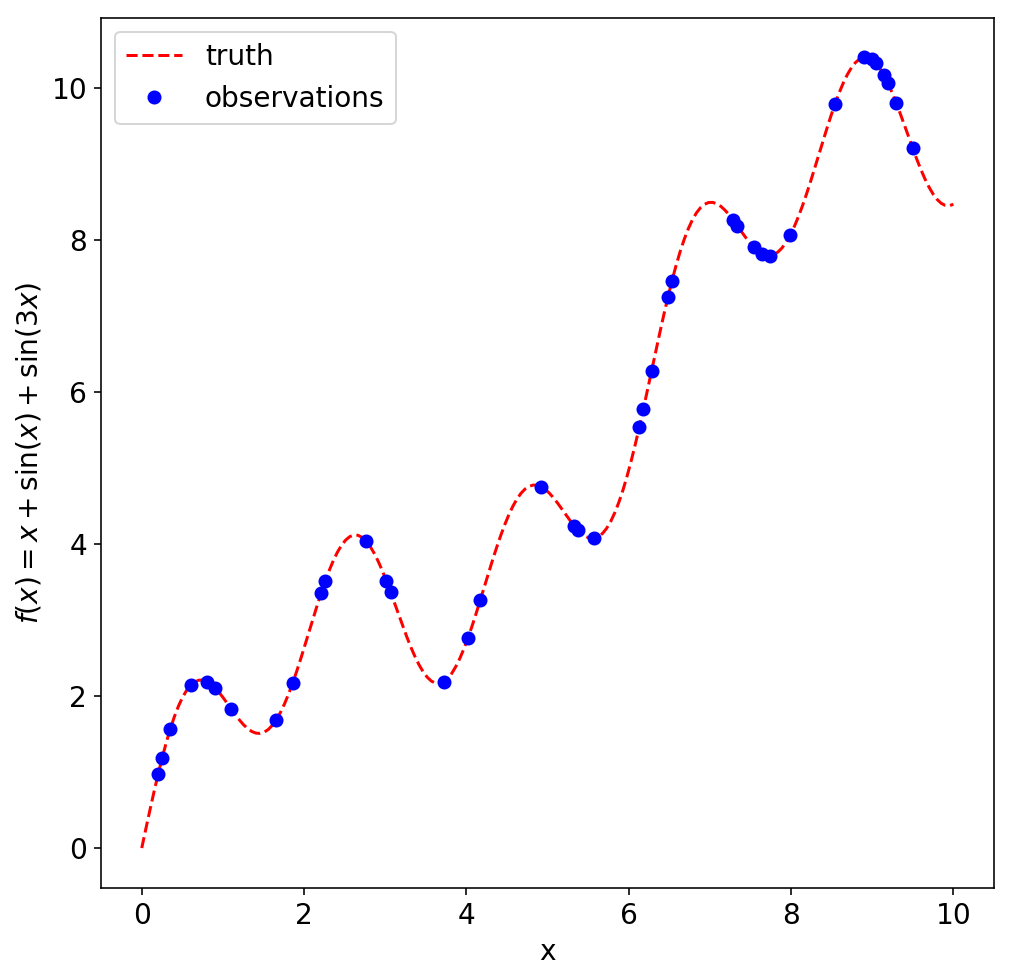

In [24]:
plt.plot(line, f(line), '--r', label='truth')
plt.plot(X, y, 'ob', label='observations')
plt.xlabel('x')
plt.ylabel('$f(x)=x+\sin(x)+\sin(3x)$')
plt.legend(loc='best');
plt.savefig("../../images/gradient_boost_true.png")

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=3, learning_rate=1)
rgr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

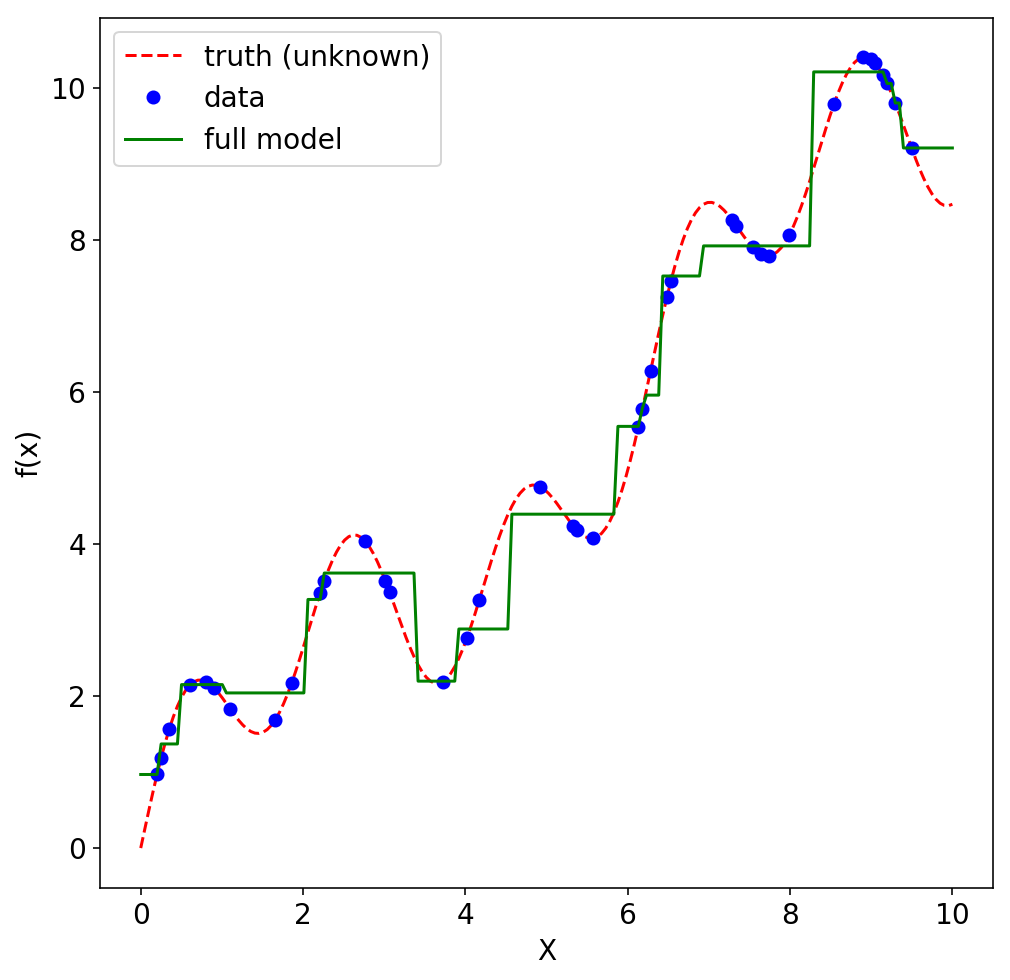

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(line, f(line), '--r', label='truth (unknown)')
ax.plot(X, y, 'ob', label='data')
ax.plot(line, rgr.predict(line.reshape(-1, 1)), '-g', label='full model')
ax.set_ylabel('f(x)')
ax.set_xlabel("X")
ax.legend(loc='best');
fig.savefig("../../images/gbr_data.png")

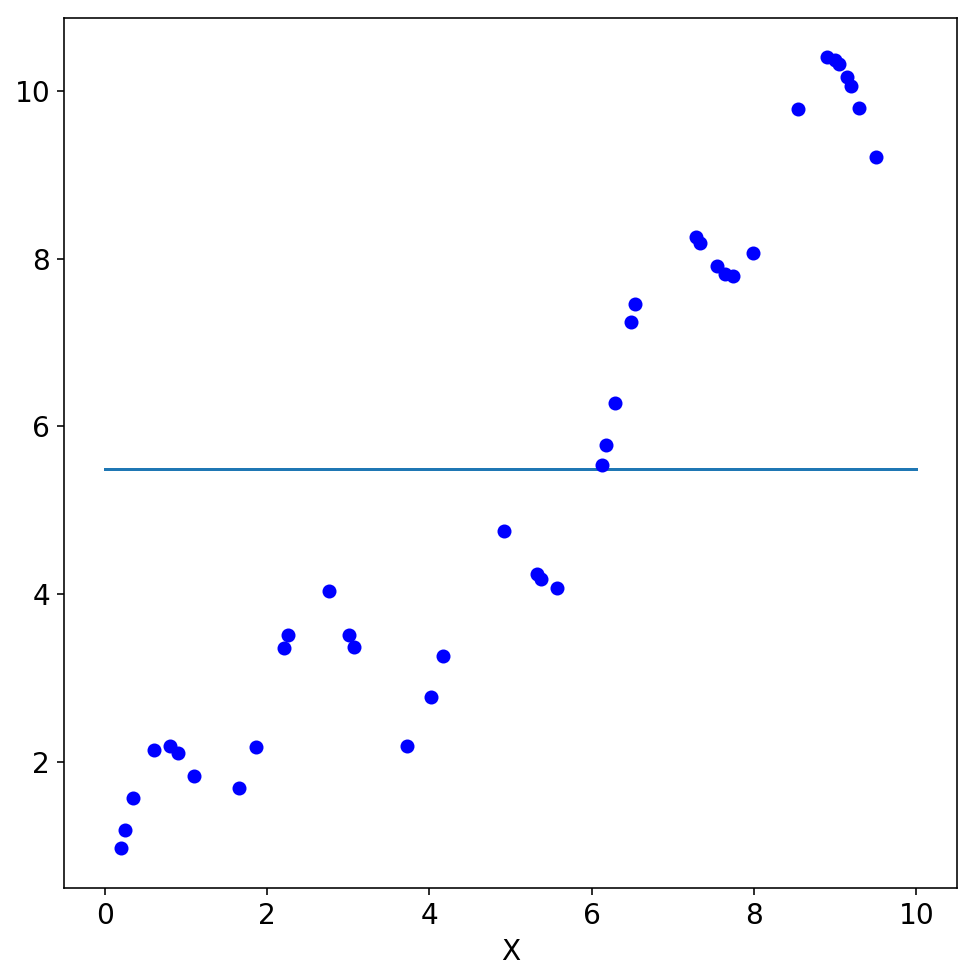

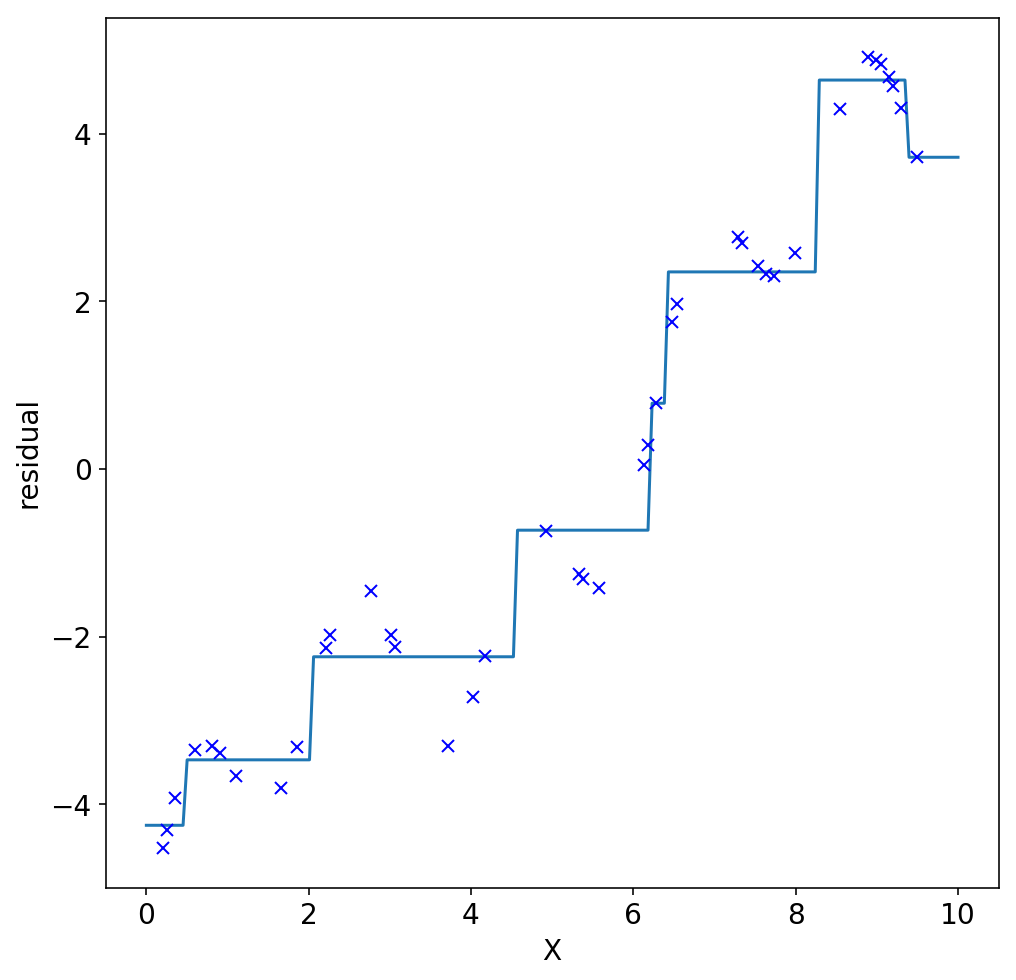

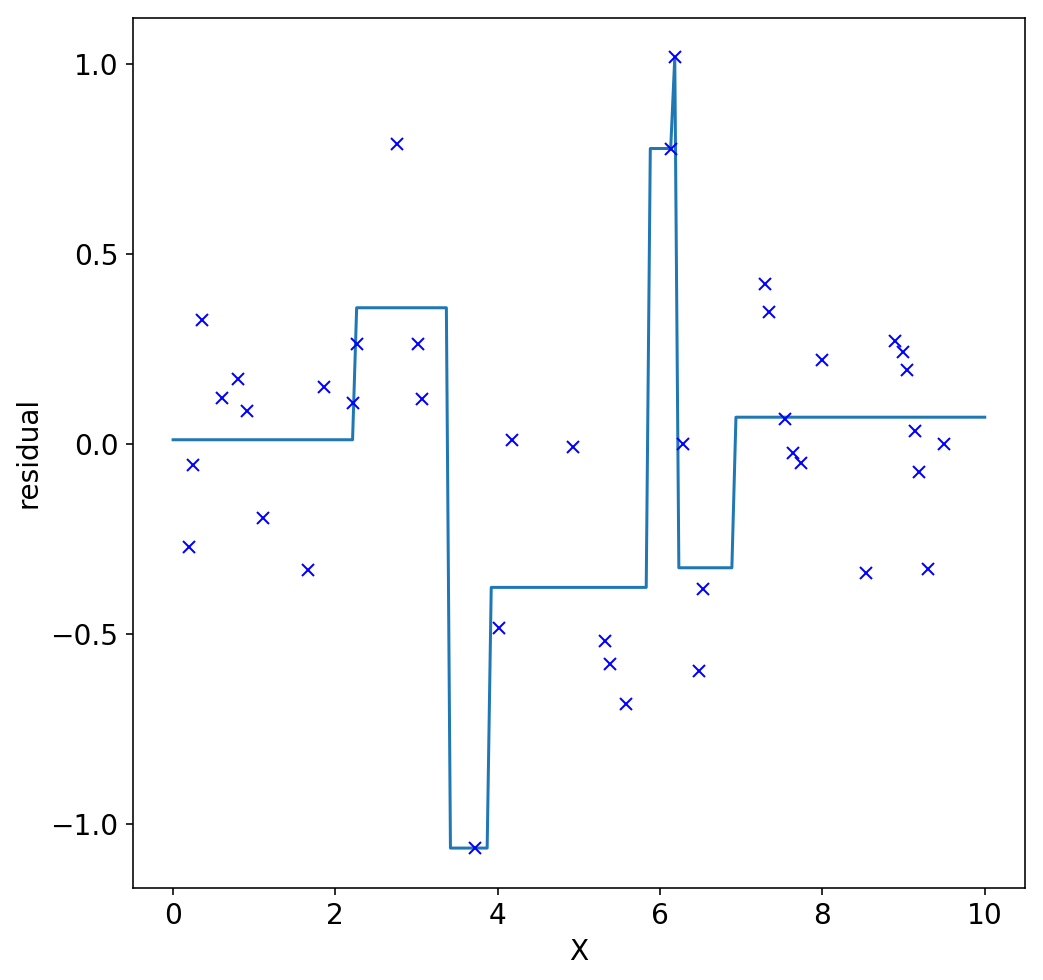

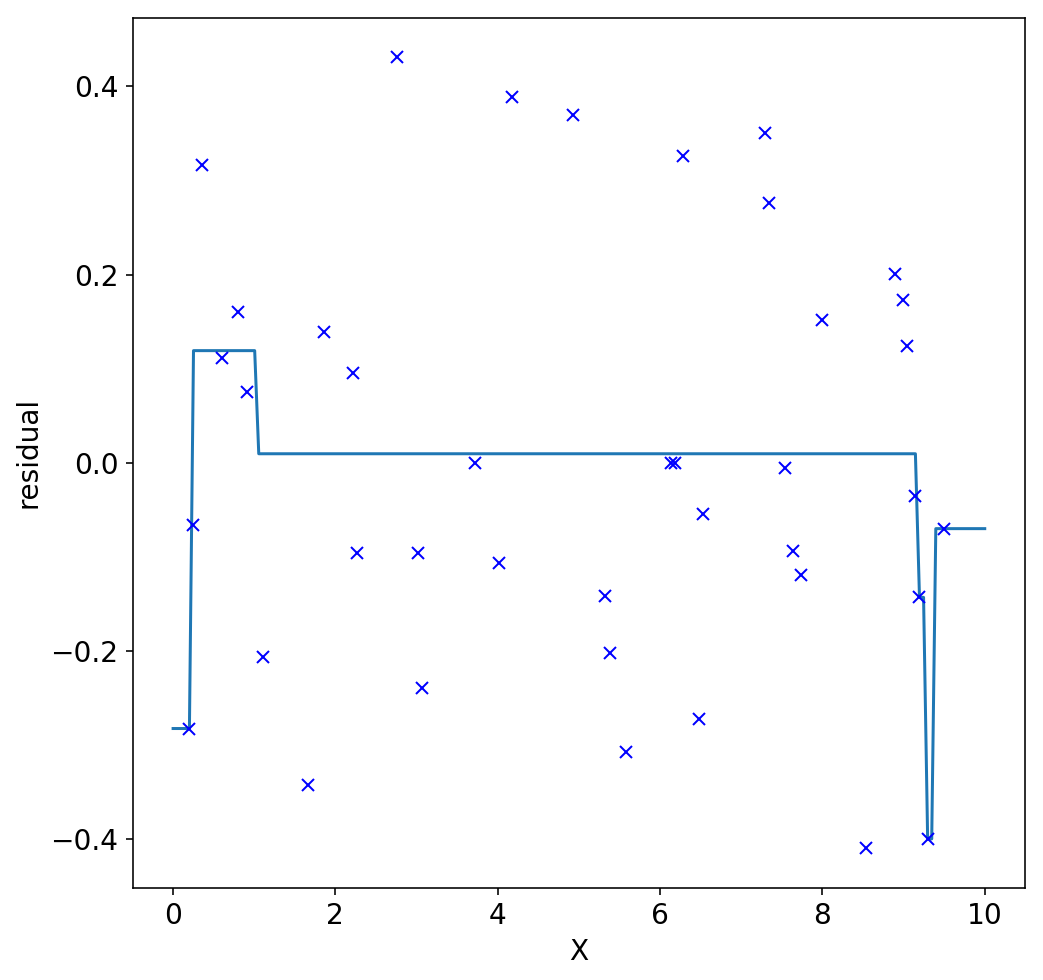

In [27]:
prev_prediction = np.ones_like(y) * np.mean(y)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot([0, 10], prev_prediction[0:2])
ax.plot(X, y, 'ob', label='data')
ax.set_xlabel("X")

# "boosts" or gradient steps
for n, est in enumerate(rgr.estimators_):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(line, est[0].predict(line.reshape(-1, 1)))
    ax.plot(X, y - prev_prediction, 'xb')
    prev_prediction += est[0].predict(X)
    ax.set_xlabel("X")
    ax.set_ylabel("residual")
    fig.savefig("../../images/gbr_stage_residuals_%i.png" % (n+1))

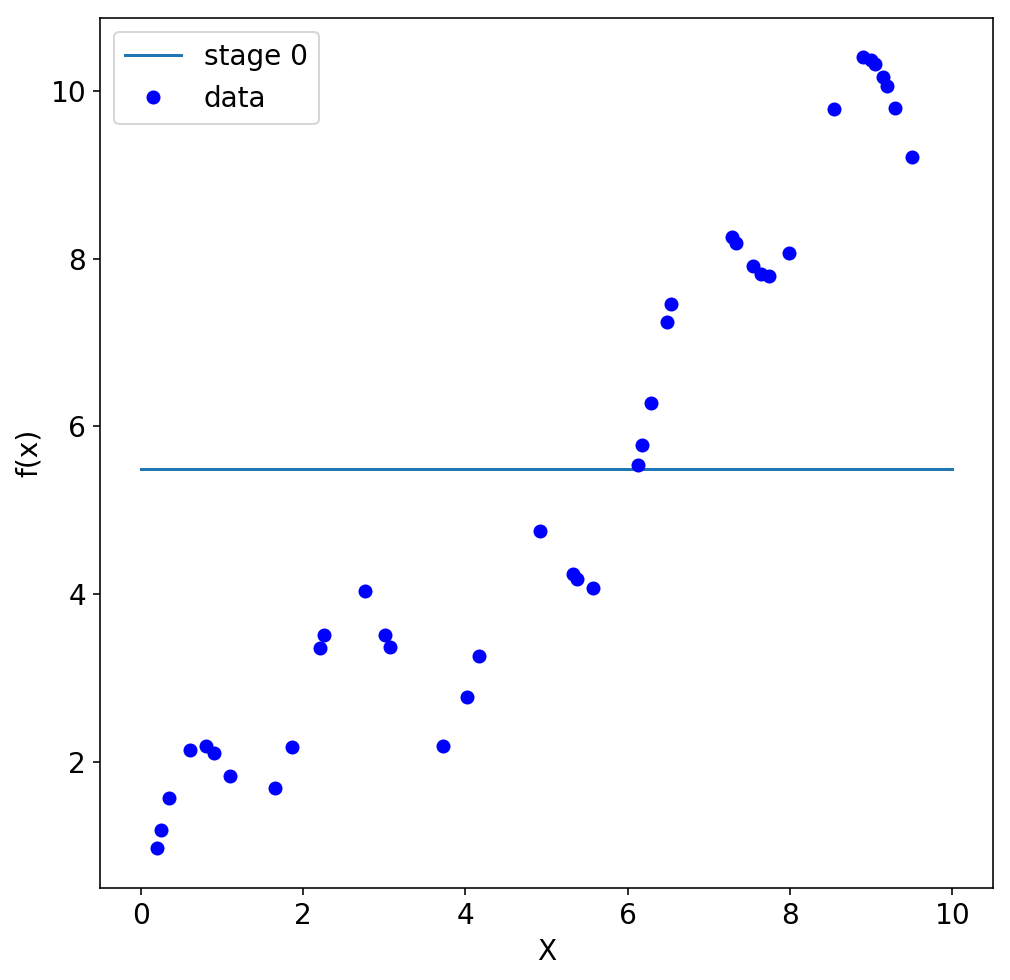

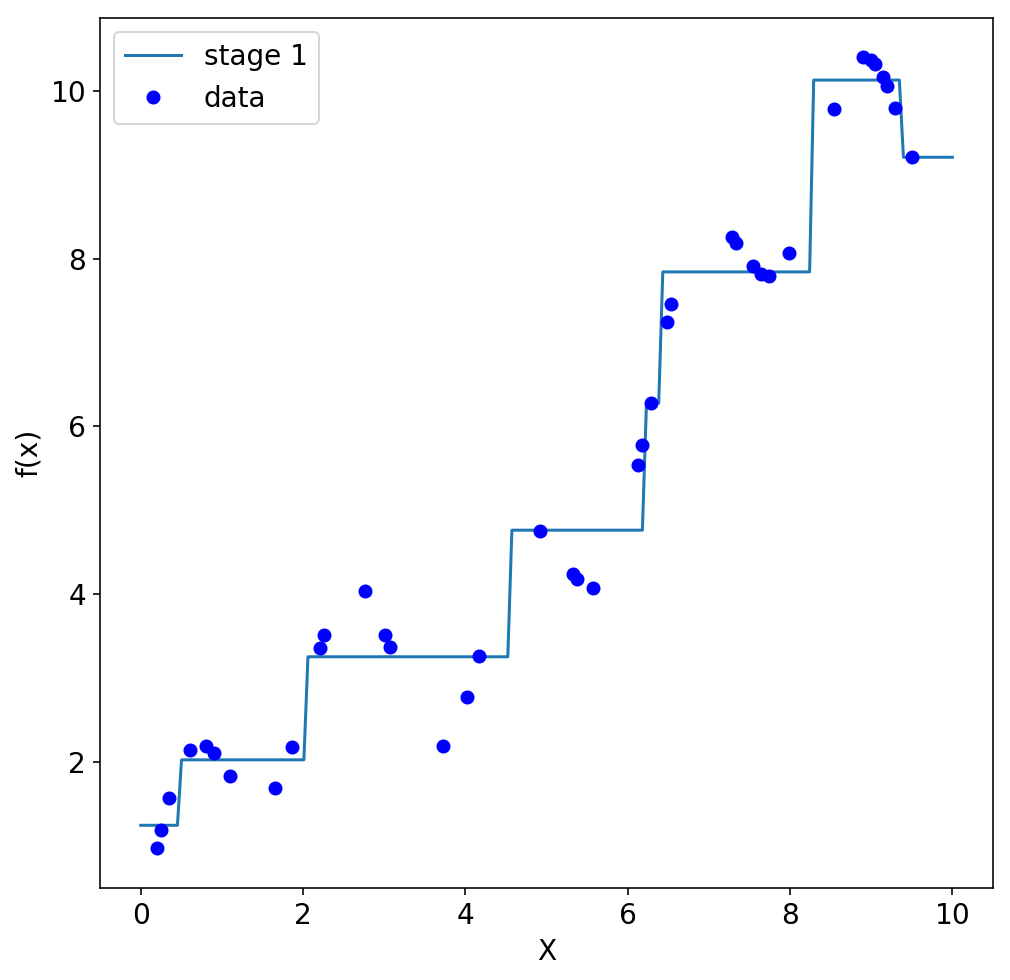

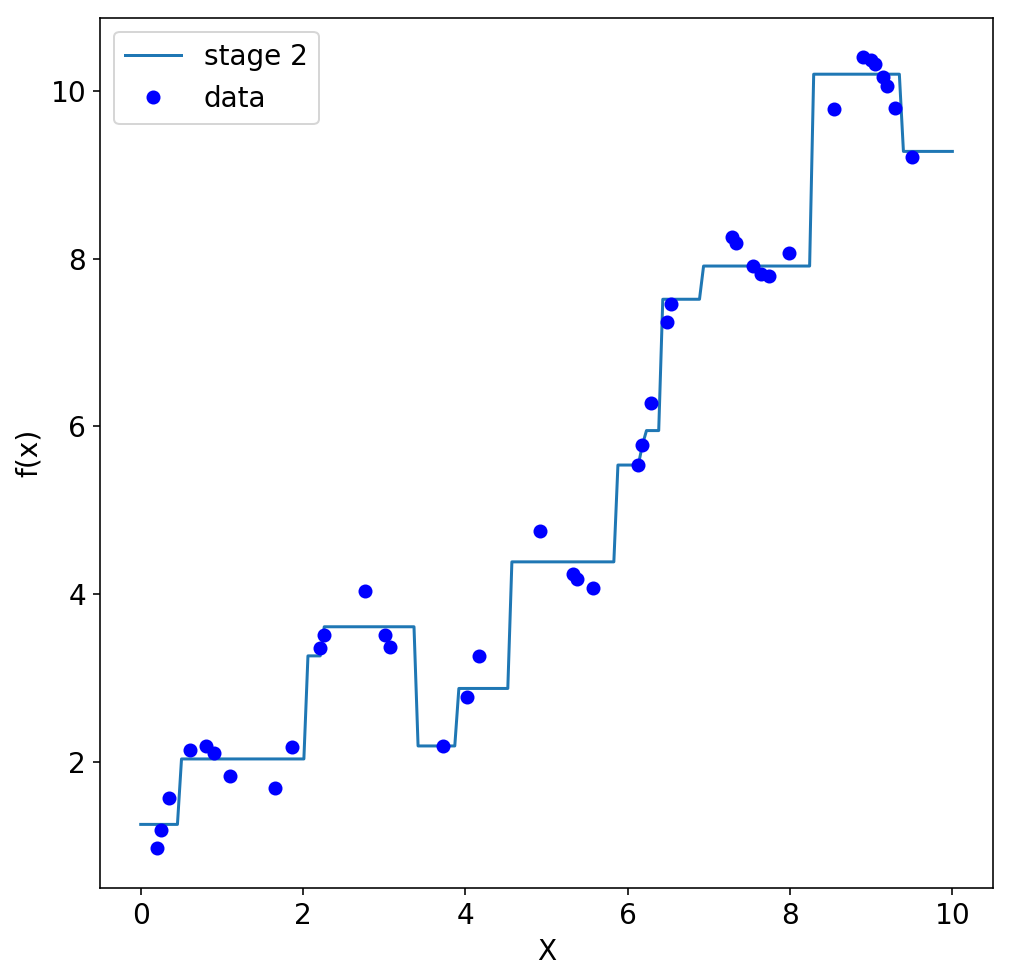

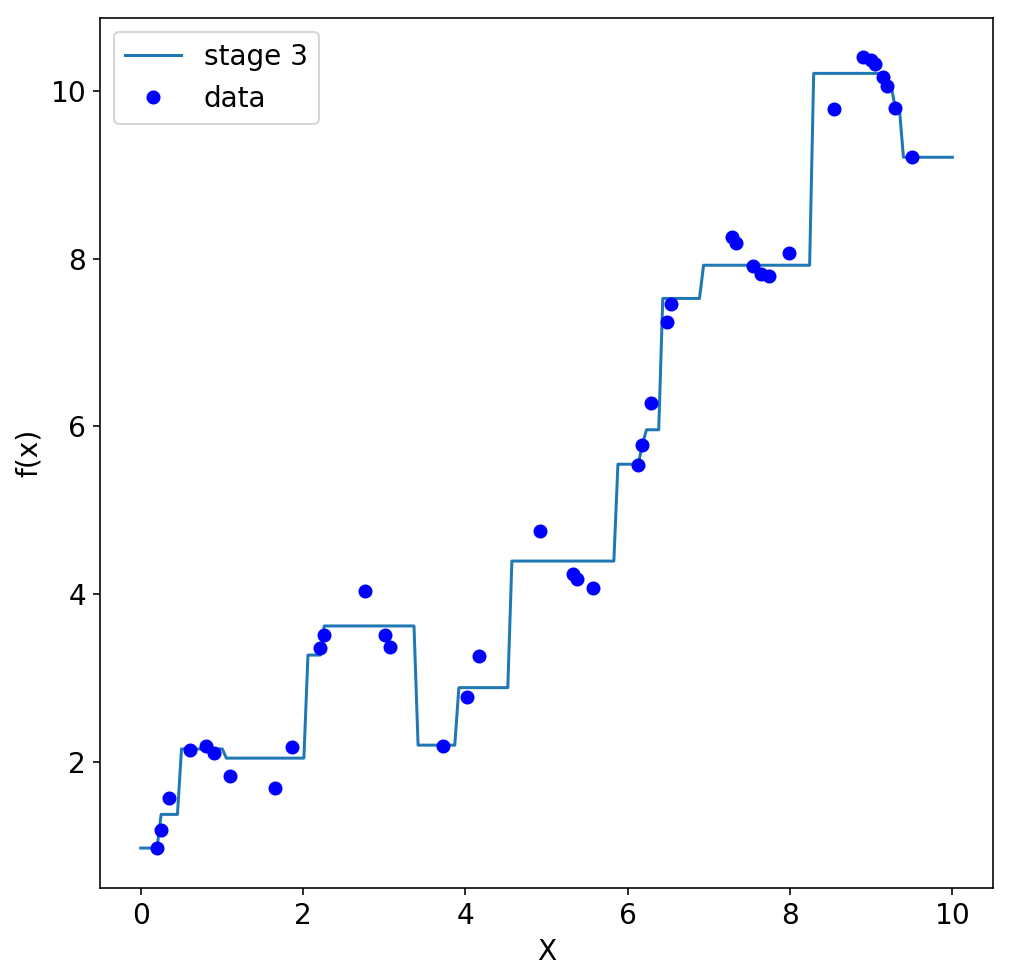

In [28]:
prev_prediction = np.ones_like(y) * np.mean(y)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot([0, 10], prev_prediction[0:2], label='stage 0')
ax.plot(X, y, 'ob', label='data')
ax.set_xlabel("X")
ax.set_ylabel("f(x)")
ax.legend(loc='best')
fig.savefig("../../images/gbr_stage_0.png")

# "boosts" or gradient steps
for n, prediction in enumerate(rgr.staged_predict(line.reshape(-1, 1))):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(line, prediction, label='stage %i' % (n+1))
    ax.plot(X, y, 'ob', label='data')

    ax.set_xlabel("X")
    ax.set_ylabel("f(x)")
    ax.legend(loc='best')
    fig.savefig("../../images/gbr_stage_%i.png" % (n+1))

In [29]:
rgr.staged_predict(line.reshape(-1, 1))

<generator object GradientBoostingRegressor.staged_predict at 0x118184938>

# Partial dependence plots

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from utils import plot_loss, load_wine

X, y = load_wine()

In [31]:
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                 "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                 "density", "pH", "sulphates", "alcohol"]

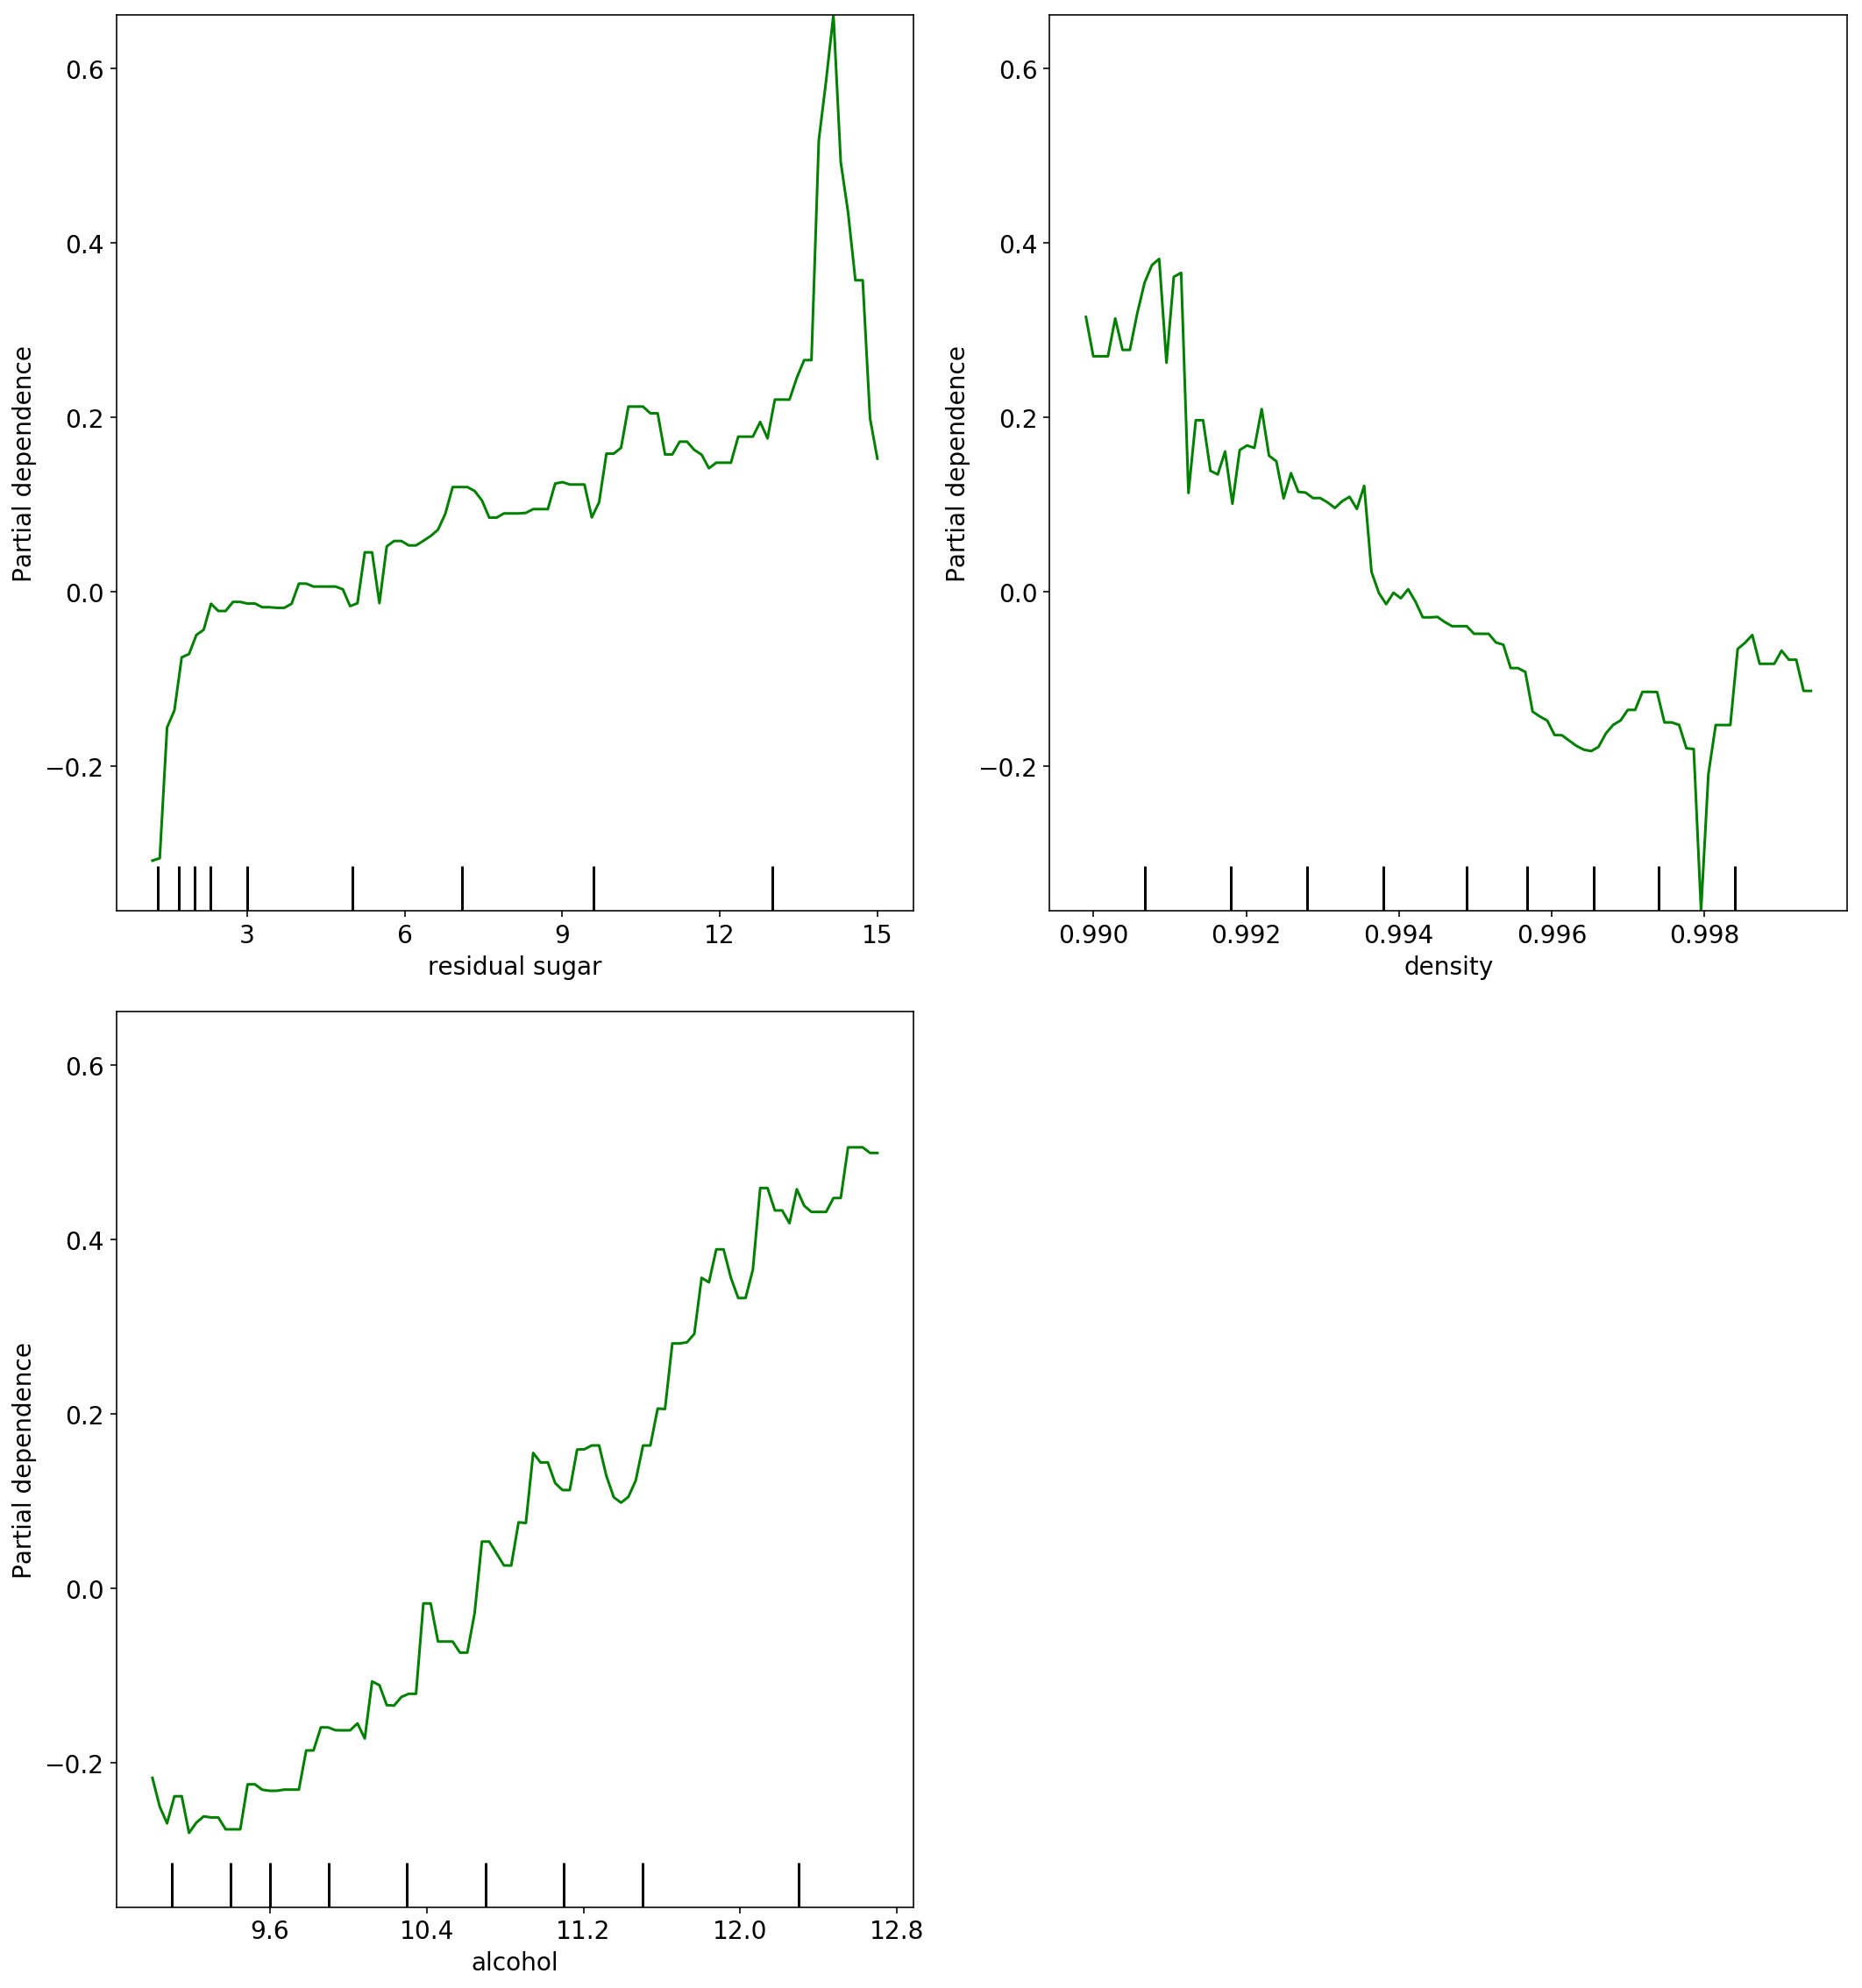

In [32]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

gbrt = GradientBoostingRegressor(n_estimators=1000, max_depth=2,
                                 learning_rate=0.1, subsample=0.5)
gbrt.fit(X, y)

plot_partial_dependence(gbrt, X, features=[3, 7, 10], feature_names=feature_names,
                        figsize=(15,16), n_cols=2);
plt.tight_layout();

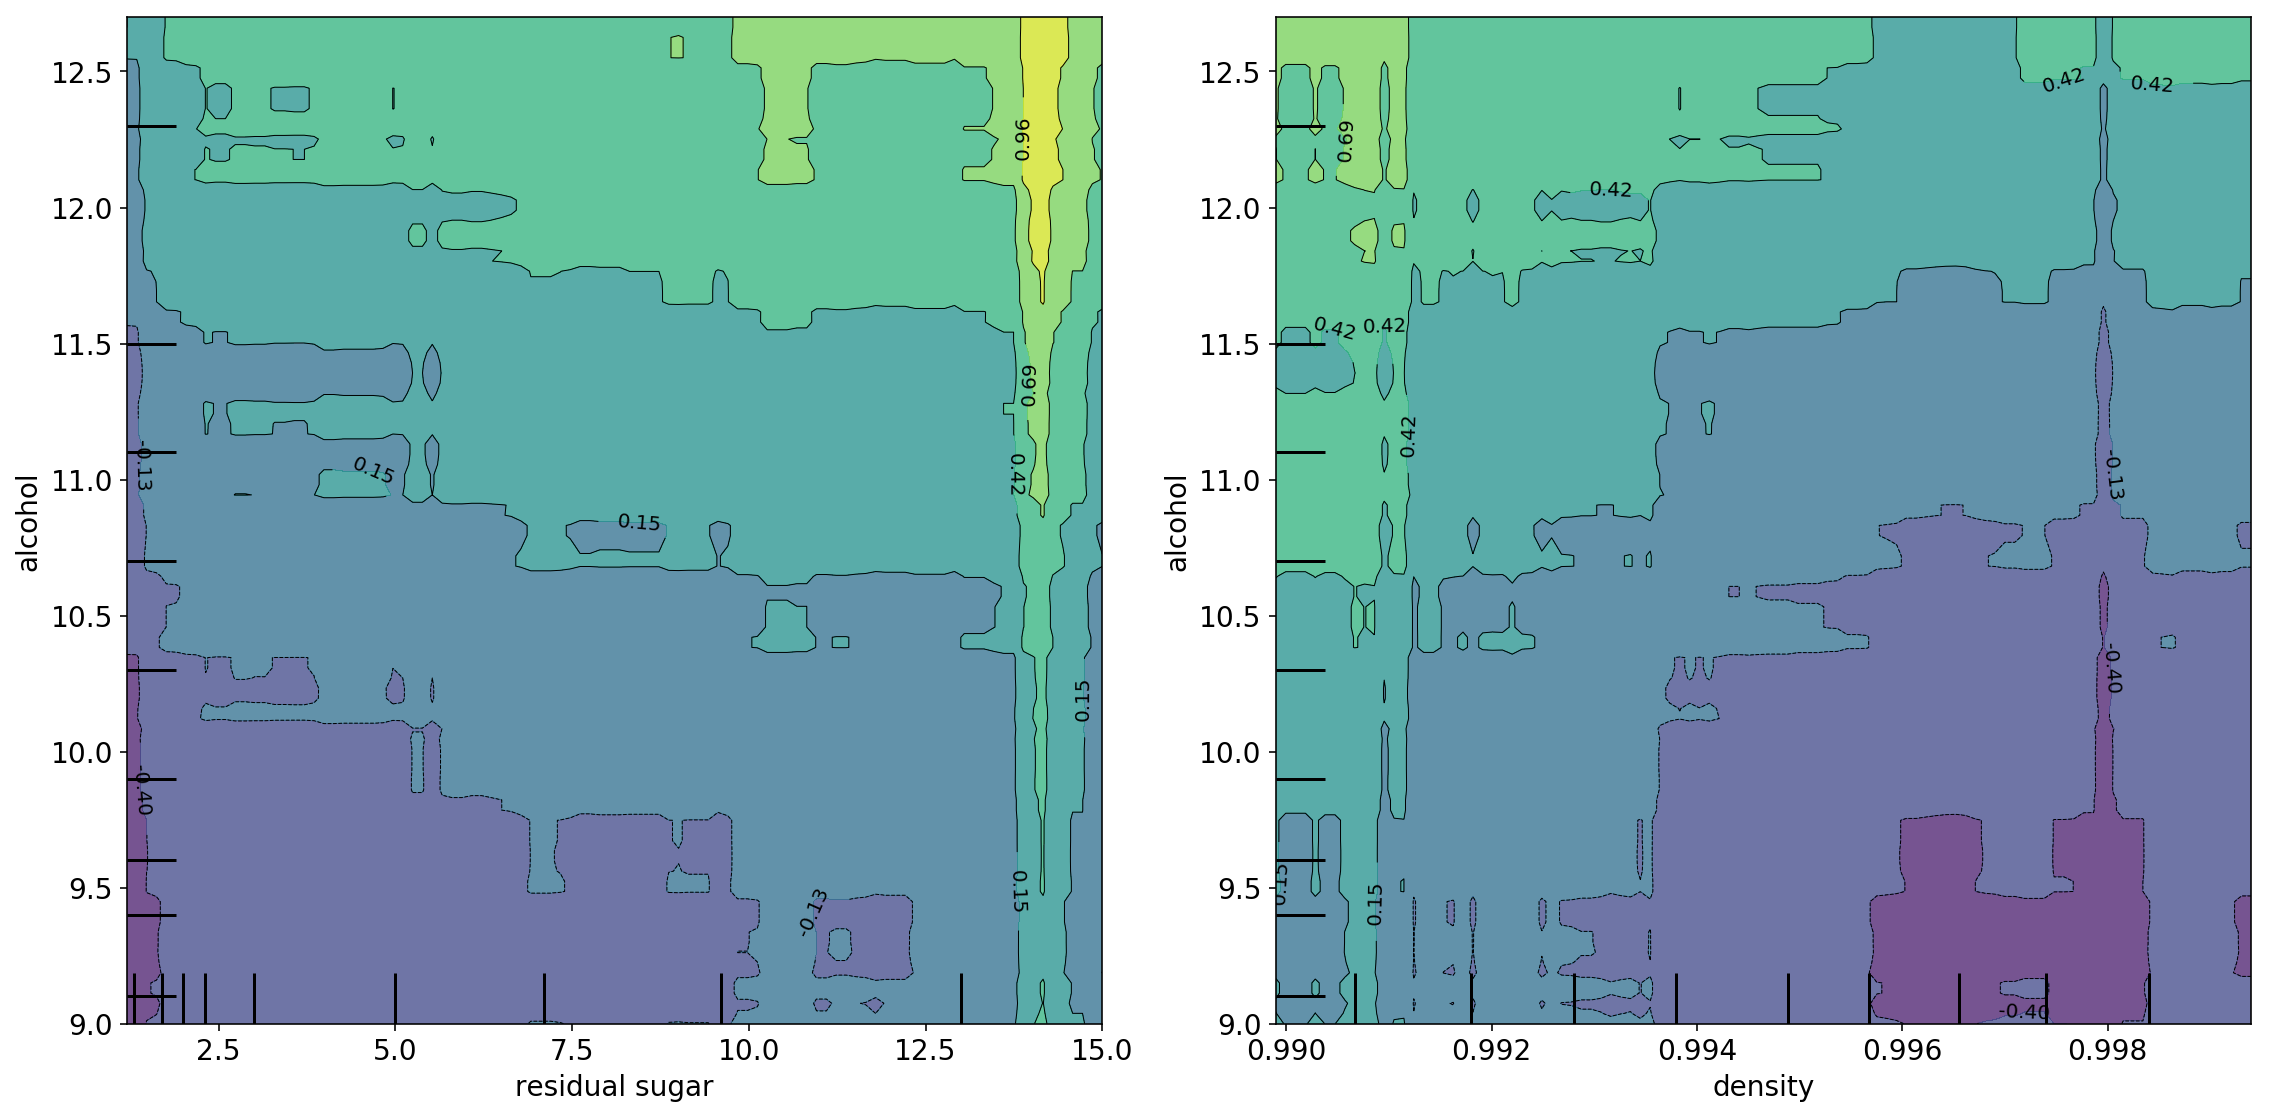

In [33]:
plot_partial_dependence(gbrt, X, features=[[3, 10], [7, 10]], feature_names=feature_names,
                        figsize=(16,8));
plt.tight_layout();